# **CAPSTONE DEFENSE PROJECT**
# **POWER BI** 


**Business Understanding**

The objective of this Power BI Dashboard project is to transform the raw transactional data collected by the client in the year 2019 into actionable insights. By leveraging business intelligence tools, we aim to empower our client to make informed decisions to drive sales and enhance operational efficiency.

**Objective:**

The primary objective of this Power BI Dashboard project is to leverage the collected transactional data from the year 2019 to provide actionable insights for our client. Specifically, the objective encompasses the following key points:

1. Revenue Analysis: Determine the total revenue generated throughout the year 2019, providing a clear understanding of the financial performance over the specified period.

2. Seasonality Assessment: Identify any recurring patterns or seasonality in sales data to facilitate better resource allocation, inventory management, and marketing strategies.

3. Product Performance Evaluation: Analyze sales data to identify the best-selling and worst-selling products, enabling the optimization of product offerings and inventory management practices.

4. Sales Trend Analysis: Compare sales performance across different time periods (months or weeks) to identify trends, fluctuations, and potential areas for improvement or expansion.

5. Geographical Insights: Determine the distribution of product deliveries across various cities to enable targeted marketing efforts and optimize logistics operations.

6. Product Category Comparison: Compare revenue generated and quantities ordered across different product categories, providing insights into the performance of various product lines and guiding future product development strategies.

7. Additional Details Integration: Incorporate additional details from the data findings to provide a comprehensive understanding of business performance, including the classification of products into high-level and basic categories based on unit prices.

By achieving these objectives, the Power BI Dashboard will empower our client to make data-driven decisions, enhance sales strategies, optimize operations, and drive overall business growth and efficiency.

**The Hypothesis**

  **Null Hypothesis:** There is no difference in revenue generated between different product categories.
  
  **Alternative Hypothesis:** Certain product categories generate significantly more revenue compared to others.

**The Analytical Questions**

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

**Data Understanding:**

The dataset provided contains the following fields:

1. Order ID: Unique identifier for each order placed.
2. Product: Name or description of the product purchased.
4. Quantity Ordered: The number of units of the product ordered in each transaction.
5. Price Each: The unit price of the product.
6. Order Date: Date and time when the order was placed.
7. Purchase Address: Address where the purchase was made or where the products were delivered.

Import the necessary modules/packages

In [2]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install plotly
# %pip install scipy
# %pip install scikit-learn

In [3]:
# Data manipulation packages
import pyodbc
from sqlalchemy import create_engine
from dotenv import dotenv_values
import pandas as pd
import numpy as np

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading data Sales January, February, March, April, May, June 2019

In [4]:
# Load data
df_sales_January_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_January_2019.csv')
df_sales_February_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_February_2019.csv')
df_sales_March_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_March_2019.csv')
df_sales_April_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_April_2019.csv')
df_sales_May_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_May_2019.csv')
df_sales_June_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_June_2019.csv')
# Display the first few rows of the DataFrame
df_sales_January_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
df_sales_January_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [6]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_January_2019['Order ID'] = pd.to_numeric(df_sales_January_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_January_2019['Quantity Ordered'] = pd.to_numeric(df_sales_January_2019['Quantity Ordered'], errors='coerce')
df_sales_January_2019['Price Each'] = pd.to_numeric(df_sales_January_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_January_2019['Order Date'] = pd.to_datetime(df_sales_January_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_January_2019.dtypes)


Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [7]:
# View the column names
df_sales_January_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_January_2019.columns:
    unique_values = df_sales_January_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 9268
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 8076
Number of unique values in 'Purchase Address': 9161


In [9]:
# Iterate over columns and view unique values
for column in df_sales_January_2019.columns:
    unique_values = df_sales_January_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[141234. 141235. 141236. ... 150499. 150500. 150501.]
Unique values in 'Product':
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  5.  4. nan  7.  6.]
Unique values in 'Price Each':
[ 700.     14.95   11.99  149.99    2.99  389.99   11.95   99.99  150.
 1700.    300.    400.      3.84  600.    109.99  379.99  999.99     nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-01-22 21:25:00', '2019-01-28 14:15:00', '2019-01-17 13:33:00',
 '2019-01-05 20:33:00', '2019-01-25 11:59:00', '2019-01-29 20:22:00',
 '2019-01-26 12:16:00', '2019-01-05 12:04:00',

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. It includes a variety of products such as iPhones, charging cables, headphones, monitors, batteries, laptops, TVs, and washing machines. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, and ZIP code.

Overall, while most columns appear to contain relevant information, there are some anomalies in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and potential cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be addressed to ensure the integrity of the dataset.

In [10]:
# View the dimensions of the DataFrame
df_sales_January_2019.shape

(9723, 6)

In [11]:
# Display descriptive statistics of the DataFrame
df_sales_January_2019.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,9681.000000,9681.000000,9681.000000,9681
mean,145859.984816,1.122611,186.449092,2019-01-16 17:33:21.394484224
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00
25%,143541.000000,1.000000,11.950000,2019-01-09 01:37:00
50%,145852.000000,1.000000,14.950000,2019-01-16 18:53:00
75%,148173.000000,1.000000,150.000000,2019-01-24 13:19:00
max,150501.000000,7.000000,1700.000000,2019-02-01 04:02:00
std,2674.333362,0.442273,330.799693,NaN


The DataFrame df_sales_January_2019 contains sales data for January 2019. Here's a summary of its descriptive statistics:

1. Order ID: There are 9697 entries. However, there are 9269 unique Order IDs, indicating some duplication or inconsistency. The most frequent entry is "Order ID" with a frequency of 16, suggesting potential header repetition or missing values.
2. Product: There are 9697 entries and 20 unique products. The most common product is the "USB-C Charging Cable" with a frequency of 1171, indicating its popularity among customers.
3. Quantity Ordered: There are 9697 entries, and the quantity ordered ranges from 1 to 8 units. The most common quantity ordered is 1, occurring 8795 times.
4. Price Each: There are 9697 entries, and the price of each item ranges from $2.99 to $1700. The most common price is $11.95, occurring 1171 times.
5. Order Date: There are 9697 entries, and 8077 unique order dates. The most frequent entry is "Order Date" with a frequency of 16, indicating potential inconsistency or repetition.
6. Purchase Address: There are 9697 entries, and 9161 unique purchase addresses. The most frequent entry is "Purchase Address" with a frequency of 16, indicating potential inconsistency or repetition.

Overall, the summary suggests that there may be inconsistencies and missing values in the dataset, particularly in the "Order ID" and "Order Date" columns. Cleaning and preprocessing may be necessary before further analysis.

In [12]:
# Count the number of missing values in each column
df_sales_January_2019.isnull().sum()

Order ID            42
Product             26
Quantity Ordered    42
Price Each          42
Order Date          42
Purchase Address    26
dtype: int64

 there are 26 missing values in each column of the DataFrame df_sales_January_2019. This suggests that there are consistent missing values across all columns, which may require further investigation or handling depending on the analysis or processing steps to be performed on the data.

In [13]:
# Count the number of duplicate rows in the DataFrame
df_sales_January_2019.duplicated().sum()

50

In [14]:
# Drop duplicate rows and reset index inplace
df_sales_January_2019.drop_duplicates(inplace=True)
df_sales_January_2019.reset_index(drop=True, inplace=True)

In [15]:
# Count the number of duplicate rows in the DataFrame
df_sales_January_2019.duplicated().sum()

0

 there are 50 duplicate rows in the DataFrame df_sales_January_2019. Duplicate rows may indicate errors in data collection or entry and may need to be investigated further to ensure data quality.

## Dataset of df_sales_February_2019

In [16]:
# Display the first few rows of the DataFrame
df_sales_February_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [17]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
df_sales_February_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          12004 non-null  object
 1   Product           12004 non-null  object
 2   Quantity Ordered  12004 non-null  object
 3   Price Each        12004 non-null  object
 4   Order Date        12004 non-null  object
 5   Purchase Address  12004 non-null  object
dtypes: object(6)
memory usage: 564.3+ KB


In [18]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_February_2019['Order ID'] = pd.to_numeric(df_sales_February_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_February_2019['Quantity Ordered'] = pd.to_numeric(df_sales_February_2019['Quantity Ordered'], errors='coerce')
df_sales_February_2019['Price Each'] = pd.to_numeric(df_sales_February_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_February_2019['Order Date'] = pd.to_datetime(df_sales_February_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_February_2019.dtypes)


Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [19]:
# View the column names
df_sales_February_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [20]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_February_2019.columns:
    unique_values = df_sales_February_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 11507
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 9626
Number of unique values in 'Purchase Address': 11316


In [21]:
# Iterate over columns and view unique values
for column in df_sales_February_2019.columns:
    unique_values = df_sales_February_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[150502. 150503. 150504. ... 162006. 162007. 162008.]
Unique values in 'Product':
['iPhone' 'AA Batteries (4-pack)' '27in 4K Gaming Monitor'
 'Lightning Charging Cable' 'Apple Airpods Headphones'
 'USB-C Charging Cable' 'Bose SoundSport Headphones' '27in FHD Monitor'
 'Wired Headphones' 'Macbook Pro Laptop' 'Flatscreen TV' '20in Monitor'
 'LG Dryer' 'AAA Batteries (4-pack)' 'ThinkPad Laptop'
 '34in Ultrawide Monitor' nan 'Google Phone' 'Vareebadd Phone'
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  4.  3. nan  5.  7.  6.]
Unique values in 'Price Each':
[ 700.      3.84  389.99   14.95  150.     11.95   99.99  149.99   11.99
 1700.    300.    109.99  600.      2.99  999.99  379.99     nan  400.  ]
Unique values in 'Order Date':
<DatetimeArray>
['2019-02-18 01:35:00', '2019-02-13 07:24:00', '2019-02-18 09:46:00',
 '2019-02-02 16:47:00', '2019-02-28 20:32:00', '2019-02-24 18:50:00',
 '2019-02-21 19:26:00', '2019-02-26 19:53:00

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. It includes a variety of products such as iPhones, batteries, monitors, charging cables, headphones, laptops, TVs, and washing machines. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.


In [22]:
# View the dimensions of the DataFrame
df_sales_February_2019.shape

(12036, 6)

In [23]:
# Display descriptive statistics of the DataFrame
df_sales_February_2019.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,11986.000000,11986.00000,11986.000000,11986
mean,156250.613382,1.12306,182.741507,2019-02-15 05:06:01.421658624
min,150502.000000,1.00000,2.990000,2019-02-01 01:51:00
25%,153374.250000,1.00000,11.950000,2019-02-08 11:25:45
50%,156247.500000,1.00000,14.950000,2019-02-15 04:03:30
75%,159123.750000,1.00000,150.000000,2019-02-22 01:17:30
max,162008.000000,7.00000,1700.000000,2019-03-01 05:56:00
std,3322.075263,0.43111,325.543296,NaN


1. Order ID: There are 12004 entries. However, there are 11508 unique Order IDs, indicating some duplication or inconsistency. The most frequent entry is "Order ID" with a frequency of 18, suggesting potential header repetition or missing values.
2. Product: There are 12004 entries and 20 unique products. The most common product is the "USB-C Charging Cable" with a frequency of 1514, indicating its popularity among customers.
3. Quantity Ordered: There are 12004 entries, and the quantity ordered ranges from 1 to 8 units. The most common quantity ordered is 1, occurring 10863 times.
4. Price Each: There are 12004 entries, and the price of each item ranges from $2.99 to $1700. The most common price is $11.95, occurring 1514 times.
5. Order Date: There are 12004 entries, and 9627 unique order dates. The most frequent entry is "Order Date" with a frequency of 18, indicating potential inconsistency or repetition.
6. Purchase Address: There are 12004 entries, and 11316 unique purchase addresses. The most frequent entry is "Purchase Address" with a frequency of 18, indicating potential inconsistency or repetition.
Similarly to the previous summary, there may be inconsistencies and missing values in the dataset, particularly in the "Order ID" and "Order Date" columns. Cleaning and preprocessing may be necessary before further analysis.

In [24]:
# Count the number of missing values in each column
df_sales_February_2019.isnull().sum()

Order ID            50
Product             32
Quantity Ordered    50
Price Each          50
Order Date          50
Purchase Address    32
dtype: int64

In the dataset for February 2019 sales (df_sales_February_2019), each column contains 32 missing values. This suggests potential data entry issues or gaps in the data collection process for that month. These missing values need to be addressed to ensure the integrity and completeness of the dataset for analysis.

In [25]:
# Count the number of duplicate rows in the DataFrame
df_sales_February_2019.duplicated().sum()

66

In [26]:
# Drop duplicate rows and reset index inplace
df_sales_February_2019.drop_duplicates(inplace=True)
df_sales_February_2019.reset_index(drop=True, inplace=True)

In [27]:
# Count the number of duplicate rows in the DataFrame
df_sales_February_2019.duplicated().sum()

0

In the DataFrame for February 2019 sales (df_sales_February_2019), there are 66 duplicate rows. These duplicates might indicate errors in data entry or repeated transactions, and they should be reviewed and potentially removed to ensure the accuracy of the dataset for analysis.

## Dataset of df_sales_March_2019

In [28]:
# Display the first few rows of the DataFrame
df_sales_March_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [29]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
df_sales_March_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
dtypes: object(6)
memory usage: 713.8+ KB


In [30]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_March_2019['Order ID'] = pd.to_numeric(df_sales_March_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_March_2019['Quantity Ordered'] = pd.to_numeric(df_sales_March_2019['Quantity Ordered'], errors='coerce')
df_sales_March_2019['Price Each'] = pd.to_numeric(df_sales_March_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_March_2019['Order Date'] = pd.to_datetime(df_sales_March_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_March_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [31]:
# View the column names
df_sales_March_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [32]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_March_2019.columns:
    unique_values = df_sales_March_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 14549
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 11783
Number of unique values in 'Purchase Address': 14247


In [33]:
# Iterate over columns and view unique values
for column in df_sales_March_2019.columns:
    unique_values = df_sales_March_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[162009. 162010. 162011. ... 176555. 176556. 176557.]
Unique values in 'Product':
['iPhone' 'Lightning Charging Cable' 'Wired Headphones'
 'Bose SoundSport Headphones' '34in Ultrawide Monitor'
 'AA Batteries (4-pack)' 'USB-C Charging Cable' 'AAA Batteries (4-pack)'
 'LG Washing Machine' 'Apple Airpods Headphones' '27in 4K Gaming Monitor'
 'Google Phone' 'Macbook Pro Laptop' '27in FHD Monitor' 'ThinkPad Laptop'
 'Vareebadd Phone' 'Flatscreen TV' '20in Monitor' 'Product' 'LG Dryer' nan]
Unique values in 'Quantity Ordered':
[ 1.  2.  5.  3.  4.  6. nan  7.]
Unique values in 'Price Each':
[ 700.     14.95   11.99   99.99  379.99    3.84   11.95    2.99  600.
  150.    389.99 1700.    149.99  999.99  400.    300.    109.99     nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-03-28 20:59:00', '2019-03-17 05:39:00', '2019-03-10 00:01:00',
 '2019-03-20 21:33:00', '2019-03-15 23:05:00', '2019-03-01 21:33:00',
 '2019-03-02 08:52:00', '2019-03-19 21:10:00', 

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. It includes a variety of products such as iPhones, charging cables, headphones, monitors, batteries, laptops, TVs, and washing machines. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.


In [34]:
# View the dimensions of the DataFrame
df_sales_March_2019.shape

(15226, 6)

In [35]:
# Display descriptive statistics of the DataFrame
df_sales_March_2019.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,15154.000000,15154.000000,15154.000000,15154
mean,169275.361687,1.122212,184.319097,2019-03-16 14:43:59.469446912
min,162009.000000,1.000000,2.990000,2019-03-01 03:15:00
25%,165632.250000,1.000000,11.950000,2019-03-08 19:32:00
50%,169277.500000,1.000000,14.950000,2019-03-16 13:35:30
75%,172912.750000,1.000000,150.000000,2019-03-24 09:36:15
max,176557.000000,7.000000,1700.000000,2019-04-01 03:21:00
std,4202.535663,0.441201,331.619714,NaN


In the DataFrame for March 2019 sales (df_sales_March_2019), the descriptive statistics are as follows:

1. Order ID: There are 15,189 entries. The number of unique order IDs is 14,550. The top value is "Order ID," occurring 35 times.
Product: There are 15,189 entries. The number of unique products is 20. The most frequent product is "USB-C Charging Cable," occurring 1,770 times.
2. Quantity Ordered: There are 15,189 entries. The number of unique quantities ordered is 8. The most frequent quantity ordered is 1, occurring 13,779 times.
3. Price Each: There are 15,189 entries. The number of unique prices is 19. The top price is $11.95, occurring 1,770 times.
Order Date: There are 15,189 entries. The number of unique order dates is 11,784. The top value is "Order Date," occurring 35 times.
4. Purchase Address: There are 15,189 entries. The number of unique purchase addresses is 14,247. The top value is "Purchase Address," occurring 35 times.
These statistics provide an overview of the data distribution and can help identify any anomalies or inconsistencies in the dataset.

In [36]:
# Count the number of missing values in each column
df_sales_March_2019.isnull().sum()

Order ID            72
Product             37
Quantity Ordered    72
Price Each          72
Order Date          72
Purchase Address    37
dtype: int64

In the DataFrame for March 2019 sales (df_sales_March_2019), there are 37 missing values in each column: Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address. These missing values need to be handled appropriately before further analysis or processing.

In [37]:
# Count the number of duplicate rows in the DataFrame
df_sales_March_2019.duplicated().sum()

95

In [38]:
# Drop duplicate rows and reset index inplace
df_sales_March_2019.drop_duplicates(inplace=True)
df_sales_March_2019.reset_index(drop=True, inplace=True)

In [39]:
# Count the number of duplicate rows in the DataFrame
df_sales_March_2019.duplicated().sum()

0

The number of duplicate rows in the DataFrame for March 2019 sales (df_sales_March_2019) is 95.

## Data set of df_sales_April_2019

In [40]:
# Display the first few rows of the DataFrame
df_sales_April_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [41]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
df_sales_April_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [42]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_April_2019['Order ID'] = pd.to_numeric(df_sales_April_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_April_2019['Quantity Ordered'] = pd.to_numeric(df_sales_April_2019['Quantity Ordered'], errors='coerce')
df_sales_April_2019['Price Each'] = pd.to_numeric(df_sales_April_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_April_2019['Order Date'] = pd.to_datetime(df_sales_April_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_April_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [43]:
# View the column names
df_sales_April_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [44]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_April_2019.columns:
    unique_values = df_sales_April_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 17537
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 13583
Number of unique values in 'Purchase Address': 17120


In [45]:
# Iterate over columns and view unique values
for column in df_sales_April_2019:
    unique_values = df_sales_April_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[176558.     nan 176559. ... 194092. 194093. 194094.]
Unique values in 'Product':
['USB-C Charging Cable' nan 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor' 'Product']
Unique values in 'Quantity Ordered':
[ 2. nan  1.  3.  5.  4.  7.  6.]
Unique values in 'Price Each':
[  11.95     nan   99.99  600.     11.99 1700.     14.95  389.99    3.84
  150.      2.99  700.    300.    149.99  109.99  999.99  400.    379.99]
Unique values in 'Order Date':
<DatetimeArray>
['2019-04-19 08:46:00',                 'NaT', '2019-04-07 22:30:00',
 '2019-04-12 14:38:00', '2019-04-30 09:27:00', '2019-04-29 13:03:00',
 '2019-04-02 07:46:00', '2019-04-12 10:58:00

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. However, there are some 'nan' values present in this column, indicating missing values.
2. Product: The 'Product' column contains the names of various products sold. Similar to previous observations, there are 'nan' and 'Product' entries, indicating missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Similar to previous observations, there are 'nan' and 'Quantity Ordered' entries, indicating missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Similar to previous observations, there are 'nan' and 'Price Each' entries, indicating missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Similar to previous observations, there are 'nan' entries, indicating missing values.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Similar to previous observations, there are 'nan' entries, indicating missing values.

As before, the anomalies in the 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address' columns need further investigation and cleaning to ensure the accuracy of the dataset. Additionally, missing values should be handled appropriately to maintain data integrity.

In [46]:
# View the dimensions of the DataFrame
df_sales_April_2019.shape

(18383, 6)

In [47]:
# Display descriptive statistics of the DataFrame
df_sales_April_2019.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,18289.000000,18289.00000,18289.000000,18289
mean,185328.816720,1.12461,184.431026,2019-04-16 03:16:12.443545344
min,176558.000000,1.00000,2.990000,2019-04-01 03:09:00
25%,180952.000000,1.00000,11.950000,2019-04-08 17:09:00
50%,185328.000000,1.00000,14.950000,2019-04-16 00:47:00
75%,189706.000000,1.00000,150.000000,2019-04-23 15:18:00
max,194094.000000,7.00000,1700.000000,2019-05-01 04:25:00
std,5061.520829,0.43641,330.913377,NaN


The summary statistics for the April 2019 sales data are as follows:

1. Order ID: There are 18,324 entries. The number of unique order IDs is 17,538. The most frequent entry is "Order ID" with a frequency of 35.
2. Product: There are 18,324 entries. There are 20 unique products. The most frequent product is "Lightning Charging Cable" with a frequency of 2,201.
3. Quantity Ordered: There are 18,324 entries. There are 8 unique quantities ordered. The most frequent quantity ordered is 1, with a frequency of 16,558.
4. Price Each: There are 18,324 entries. There are 19 unique prices. The most frequent price is $14.95, with a frequency of 2,201.
5. Order Date: There are 18,324 entries. There are 13,584 unique order dates. The most frequent entry is "Order Date" with a frequency of 35.
6. Purchase Address: There are 18,324 entries. There are 17,120 unique purchase addresses. The most frequent entry is "Purchase Address" with a frequency of 35.

In [48]:
# Count the number of missing values in each column
df_sales_April_2019.isnull().sum()

Order ID            94
Product             59
Quantity Ordered    94
Price Each          94
Order Date          94
Purchase Address    59
dtype: int64

The April 2019 sales data has 59 missing values in each of the columns: 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address'.

In [49]:
# Count the number of duplicate rows in the DataFrame
df_sales_April_2019.duplicated().sum()

114

In [50]:
# Drop duplicate rows and reset index inplace
df_sales_April_2019.drop_duplicates(inplace=True)
df_sales_April_2019.reset_index(drop=True, inplace=True)

In [51]:
# Count the number of duplicate rows in the DataFrame
df_sales_April_2019.duplicated().sum()

0


There are 114 duplicate rows in the April 2019 sales data DataFrame.

## Dataset of df_sales_April_2019

In [52]:
# Display the first few rows of the DataFrame
df_sales_May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [53]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
df_sales_May_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          16587 non-null  object
 1   Product           16587 non-null  object
 2   Quantity Ordered  16587 non-null  object
 3   Price Each        16587 non-null  object
 4   Order Date        16587 non-null  object
 5   Purchase Address  16587 non-null  object
dtypes: object(6)
memory usage: 779.9+ KB


In [54]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_May_2019['Order ID'] = pd.to_numeric(df_sales_May_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_May_2019['Quantity Ordered'] = pd.to_numeric(df_sales_May_2019['Quantity Ordered'], errors='coerce')
df_sales_May_2019['Price Each'] = pd.to_numeric(df_sales_May_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_May_2019['Order Date'] = pd.to_datetime(df_sales_May_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_May_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [55]:
# View the column names
df_sales_May_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [56]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_May_2019.columns:
    unique_values = df_sales_May_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 15826
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 12664
Number of unique values in 'Purchase Address': 15461


In [57]:
# Iterate over columns and view unique values
for column in df_sales_May_2019:
    unique_values = df_sales_May_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[194095. 194096. 194097. ... 209918. 209919. 209920.]
Unique values in 'Product':
['Wired Headphones' 'AA Batteries (4-pack)' '27in FHD Monitor'
 'AAA Batteries (4-pack)' 'iPhone' 'USB-C Charging Cable'
 'Lightning Charging Cable' 'ThinkPad Laptop' '34in Ultrawide Monitor'
 'Google Phone' 'Apple Airpods Headphones' 'LG Dryer'
 'Bose SoundSport Headphones' 'Flatscreen TV' '27in 4K Gaming Monitor' nan
 'Macbook Pro Laptop' '20in Monitor' 'Vareebadd Phone'
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3. nan  4.  5.  6.  7.]
Unique values in 'Price Each':
[  11.99    3.84  149.99    2.99  700.     11.95   14.95  999.99  379.99
  600.    150.     99.99  300.    389.99     nan 1700.    109.99  400.  ]
Unique values in 'Order Date':
<DatetimeArray>
['2019-05-16 17:14:00', '2019-05-19 14:43:00', '2019-05-24 11:36:00',
 '2019-05-02 20:40:00', '2019-05-11 22:55:00', '2019-05-10 19:44:00',
 '2019-05-11 22:44:00', '2019-05-07 12:49:00

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.

In [58]:
# View the dimensions of the DataFrame
df_sales_May_2019.shape

(16635, 6)

In [59]:
# Display descriptive statistics of the DataFrame
df_sales_May_2019.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,16554.000000,16554.000000,16554.000000,16554
mean,201999.950465,1.127039,188.902815,2019-05-16 15:37:57.285248256
min,194095.000000,1.000000,2.990000,2019-05-01 02:50:00
25%,198042.000000,1.000000,11.950000,2019-05-08 21:49:15
50%,201997.500000,1.000000,14.950000,2019-05-16 14:53:00
75%,205955.750000,1.000000,150.000000,2019-05-24 08:34:00
max,209920.000000,7.000000,1700.000000,2019-06-01 03:26:00
std,4570.749762,0.448511,342.102464,NaN


The descriptive statistics of the May 2019 sales data indicate that:

There are 16,587 records in the DataFrame.
1. The 'Order ID' column has 15,827 unique values, indicating some duplication in this column.
2. The 'Product' column has 20 unique values.
3. The 'Quantity Ordered' column has 8 unique values.
4. The 'Price Each' column has 22 unique values.
5. The 'Order Date' column has 12,665 unique values, suggesting variability in the order dates.
6. The 'Purchase Address' column has 15,461 unique values.
The most frequent value in the 'Product' column is 'Lightning Charging Cable', with 1,932 occurrences.
The most frequent value in the 'Quantity Ordered' column is '1', with 14,977 occurrences.
The most frequent value in the 'Price Each' column is '14.95', with 1,932 occurrences.
The most frequent value in the 'Order Date' column is 'Order Date', with 33 occurrences.
The most frequent value in the 'Purchase Address' column is 'Purchase Address', with 33 occurrences.

In [60]:
# Count the number of missing values in each column
df_sales_May_2019.isnull().sum()

Order ID            81
Product             48
Quantity Ordered    81
Price Each          81
Order Date          81
Purchase Address    48
dtype: int64

In the May 2019 sales data, there are 48 missing values in each of the following columns: 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address'.

In [61]:
# Count the number of duplicate rows in the DataFrame
df_sales_May_2019.duplicated().sum()

93

In [62]:
# Drop duplicate rows and reset index inplace
df_sales_May_2019.drop_duplicates(inplace=True)
df_sales_May_2019.reset_index(drop=True, inplace=True)

In [63]:
# Count the number of duplicate rows in the DataFrame
df_sales_May_2019.duplicated().sum()

0

In the May 2019 sales data, there are 93 duplicate rows.

## Dataset of df_sales_June_2019

In [64]:
# Display the first few rows of the DataFrame
df_sales_June_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [65]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
df_sales_June_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          13579 non-null  object
 1   Product           13579 non-null  object
 2   Quantity Ordered  13579 non-null  object
 3   Price Each        13579 non-null  object
 4   Order Date        13579 non-null  object
 5   Purchase Address  13579 non-null  object
dtypes: object(6)
memory usage: 638.7+ KB


In [66]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_June_2019['Order ID'] = pd.to_numeric(df_sales_June_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_June_2019['Quantity Ordered'] = pd.to_numeric(df_sales_June_2019['Quantity Ordered'], errors='coerce')
df_sales_June_2019['Price Each'] = pd.to_numeric(df_sales_June_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_June_2019['Order Date'] = pd.to_datetime(df_sales_June_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_June_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [67]:
# View the column names
df_sales_June_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [68]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_June_2019:
    unique_values = df_sales_June_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 12989
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 10741
Number of unique values in 'Purchase Address': 12720


In [69]:
# Iterate over columns and view unique values
for column in df_sales_June_2019:
    unique_values = df_sales_June_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[209921. 209922. 209923. ... 222907. 222908. 222909.]
Unique values in 'Product':
['USB-C Charging Cable' 'Macbook Pro Laptop' 'ThinkPad Laptop'
 '27in FHD Monitor' 'Bose SoundSport Headphones'
 'Apple Airpods Headphones' 'Lightning Charging Cable' 'Wired Headphones'
 'Flatscreen TV' 'AA Batteries (4-pack)' 'AAA Batteries (4-pack)'
 '34in Ultrawide Monitor' 'iPhone' 'Google Phone' '27in 4K Gaming Monitor'
 '20in Monitor' 'Product' 'LG Dryer' 'Vareebadd Phone'
 'LG Washing Machine' nan]
Unique values in 'Quantity Ordered':
[ 1.  3.  2. nan  5.  4.  9.  6.]
Unique values in 'Price Each':
[  11.95 1700.    999.99  149.99   99.99  150.     14.95   11.99  300.
    3.84    2.99  379.99  700.    600.    389.99  109.99     nan  400.  ]
Unique values in 'Order Date':
<DatetimeArray>
['2019-06-23 19:34:00', '2019-06-30 10:05:00', '2019-06-24 20:18:00',
 '2019-06-05 10:21:00', '2019-06-25 18:58:00', '2019-06-28 20:04:00',
 '2019-06-28 00:07:00', '2019-06-16 21:30:00',

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.

In [70]:
# View the dimensions of the DataFrame
df_sales_June_2019.shape

(13622, 6)

In [71]:
# Display descriptive statistics of the DataFrame
df_sales_June_2019.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,13556.000000,13556.000000,13556.000000,13556
mean,216411.627693,1.125332,189.030435,2019-06-16 03:27:25.104750848
min,209921.000000,1.000000,2.990000,2019-06-01 04:52:00
25%,213161.750000,1.000000,11.950000,2019-06-08 16:25:30
50%,216406.500000,1.000000,14.950000,2019-06-15 23:16:00
75%,219655.250000,1.000000,150.000000,2019-06-23 14:36:45
max,222909.000000,9.000000,1700.000000,2019-07-01 03:09:00
std,3753.481273,0.429463,336.863776,NaN



In the June 2019 sales data:

1. The Order ID column has 23 occurrences of the top value "Order ID".
2. The Product column has 20 unique values.
3. The Quantity Ordered column has 8 unique values.
4. The Price Each column has 23 unique values.
5. The Order Date column has 10,742 unique values.
6. The Purchase Address column has 12,720 unique values.

In [72]:
# Count the number of missing values in each column
df_sales_June_2019.isnull().sum()

Order ID            66
Product             43
Quantity Ordered    66
Price Each          66
Order Date          66
Purchase Address    43
dtype: int64

In the June 2019 sales data, there are 43 missing values in each of the following columns: Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address.

In [73]:
# Count the number of duplicate rows in the DataFrame
df_sales_June_2019.duplicated().sum()

83

In [74]:
# Drop duplicate rows and reset index inplace
df_sales_June_2019.drop_duplicates(inplace=True)
df_sales_June_2019.reset_index(drop=True, inplace=True)

In [75]:
# Count the number of duplicate rows in the DataFrame
df_sales_June_2019.duplicated().sum()

0

There are 83 duplicate rows in the June 2019 sales data DataFrame.

In [76]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [77]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("servername")
database = environment_variables.get("databasename")
username = environment_variables.get("user")
password = environment_variables.get("password")

In [78]:
# Define connection string with appropriate parameters
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [79]:
# Establish a connection to the database using the provided connection string.
connection= pyodbc.connect(connection_string)

Loading server data

## Dataset of dbo.Sales_July_2019 on server

In [80]:
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.Sales_July_2019"

# Read data from the SQL query result
dap_july = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
dap_july.head()


C:\Users\Said Ahmed\AppData\Local\Temp\ipykernel_6516\3596020920.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_july = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"


In [81]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
dap_july.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          14291 non-null  float64       
 1   Product           14326 non-null  object        
 2   Quantity_Ordered  14291 non-null  float64       
 3   Price_Each        14291 non-null  float64       
 4   Order_Date        14291 non-null  datetime64[ns]
 5   Purchase_Address  14326 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 673.8+ KB


In [82]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_july.rename(columns=new_column_names, inplace=True)


In [83]:
# Convert 'Order Date' column to datetime
dap_july['Order Date'] = pd.to_datetime(dap_july['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_july.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [84]:
# View the column names
dap_july.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [85]:
# Iterate over columns and print the number of unique values in each column
for column in dap_july:
    unique_values = dap_july[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 13760
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 9
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 11348
Number of unique values in 'Purchase Address': 13472


In [86]:
# Iterate over columns and view unique values
for column in dap_july.columns:
    unique_values = dap_july[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[222910. 222911. 222912. ... 236667. 236668. 236669.]
Unique values in 'Product':
['Apple Airpods Headphones' 'Flatscreen TV' 'AA Batteries (4-pack)'
 'AAA Batteries (4-pack)' 'Bose SoundSport Headphones' 'Google Phone'
 'LG Dryer' 'USB-C Charging Cable' 'Lightning Charging Cable'
 '34in Ultrawide Monitor' 'Wired Headphones' 'Vareebadd Phone'
 '27in FHD Monitor' '20in Monitor' 'ThinkPad Laptop'
 '27in 4K Gaming Monitor' 'Macbook Pro Laptop' 'iPhone' None
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  5.  2.  3. nan  4.  6.  7.  8.  9.]
Unique values in 'Price Each':
[ 150.          300.            3.83999991    2.99000001   99.98999786
  600.           11.94999981   14.94999981  379.98999023   11.98999977
  400.          149.99000549  109.98999786  999.98999023  389.98999023
 1700.          700.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['2026-07-19 16:51:00', '2005-07-19 08:55:00', '2029-07-19 12:41:

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format, but there might be some inconsistencies in the date format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

There seem to be some inconsistencies in the data, such as different date formats in the 'Order_Date' column and missing values in the 'Quantity_Ordered' and 'Price_Each' columns. Additionally, the 'Product' column contains 'None' and 'Product' entries, which need to be addressed. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [87]:
# View the dimensions of the DataFrame
dap_july.shape

(14371, 6)

In [88]:
# Display descriptive statistics of the DataFrame
dap_july.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,14291.000000,14291.000000,14291.000000,14291
mean,229788.516269,1.124414,184.149922,2016-06-30 03:38:13.947239424
min,222910.000000,1.000000,2.990000,2001-07-19 06:08:00
25%,226347.500000,1.000000,11.950000,2008-07-19 17:59:30
50%,229783.000000,1.000000,14.950000,2016-07-19 12:54:00
75%,233228.500000,1.000000,150.000000,2024-07-19 10:33:00
max,236669.000000,9.000000,1700.000000,2031-07-19 23:43:00
std,3970.663121,0.460838,332.954499,NaN


In July, the sales data indicates the following:

1. Order_ID: The orders range from 222910 to 236669, with an average of around 229788. The standard deviation is approximately 3970.66, suggesting a moderate dispersion around the mean.
2. Quantity_Ordered: On average, each order consists of approximately 1.12 items, with a standard deviation of around 0.46. The minimum quantity ordered is 1, while the maximum is 9.
3. Price_Each: The average price per item sold is approximately $184.15, with a considerable standard deviation of $332.95. Prices range from $2.99 to $1700.00.

In [89]:
# Count the number of missing values in each column
dap_july.isnull().sum()

Order ID            80
Product             45
Quantity Ordered    80
Price Each          80
Order Date          80
Purchase Address    45
dtype: int64

In July, there are 80 missing values in the 'Order_ID', 'Quantity_Ordered', 'Price_Each', and 'Order_Date' columns. Additionally, there are 45 missing values in the 'Product' and 'Purchase_Address' columns.

In [90]:
# Count the number of duplicate rows in the DataFrame
dap_july.duplicated().sum()

96

In [91]:
# Drop duplicate rows and reset index inplace
dap_july.drop_duplicates(inplace=True)
dap_july.reset_index(drop=True, inplace=True)

In [92]:
# Count the number of duplicate rows in the DataFrame
dap_july.duplicated().sum()

0

In July, there are 96 duplicate rows in the DataFrame.

## Dataset of dbo.Sales_August_2019 on server

In [93]:
query = "Select * from dbo.Sales_August_2019"

dap_august = pd.read_sql(query, connection)

dap_august.head()


C:\Users\Said Ahmed\AppData\Local\Temp\ipykernel_6516\949500391.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_august = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


In [94]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
dap_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          11957 non-null  float64       
 1   Product           11983 non-null  object        
 2   Quantity_Ordered  11957 non-null  float64       
 3   Price_Each        11957 non-null  float64       
 4   Order_Date        11957 non-null  datetime64[ns]
 5   Purchase_Address  11983 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 563.1+ KB


In [95]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_august.rename(columns=new_column_names, inplace=True)


In [96]:
# Convert 'Order Date' column to datetime
dap_august['Order Date'] = pd.to_datetime(dap_august['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_august.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [97]:
# View the column names
dap_august.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [98]:
# Iterate over columns and print the number of unique values in each column
for column in dap_august.columns:
    unique_values = dap_august[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 11481
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 8
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 9732
Number of unique values in 'Purchase Address': 11296


In [99]:
# Iterate over columns and view unique values
for column in dap_august.columns:
    unique_values = dap_august[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[236670. 236671. 236672. ... 248148. 248149. 248150.]
Unique values in 'Product':
['Wired Headphones' 'Bose SoundSport Headphones' 'iPhone'
 'AA Batteries (4-pack)' '34in Ultrawide Monitor' '20in Monitor'
 'Macbook Pro Laptop' 'LG Washing Machine' '27in FHD Monitor'
 'Lightning Charging Cable' 'Apple Airpods Headphones'
 'AAA Batteries (4-pack)' 'USB-C Charging Cable' '27in 4K Gaming Monitor'
 'ThinkPad Laptop' 'Flatscreen TV' 'Google Phone' 'Vareebadd Phone'
 'Product' None 'LG Dryer']
Unique values in 'Quantity Ordered':
[ 2.  1.  3.  4. nan  6.  7.  5.  8.]
Unique values in 'Price Each':
[  11.98999977   99.98999786  700.            3.83999991  379.98999023
  109.98999786 1700.          600.          149.99000549   14.94999981
  150.            2.99000001   11.94999981  389.98999023  999.98999023
  300.          400.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['2031-08-19 22:21:00', '2015-08-19 15:11:00', '2006-08-19 14:40:00',

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

The data seems to have similar issues as before, with missing values in the 'Quantity_Ordered' and 'Price_Each' columns, and inconsistent entries in the 'Product' column. Additionally, there appear to be no missing values in the 'Order_ID', 'Order_Date', and 'Purchase_Address' columns. Further cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [100]:
# View the dimensions of the DataFrame
dap_august.shape

(12011, 6)

In [101]:
# Display descriptive statistics of the DataFrame
dap_august.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,11957.000000,11957.000000,11957.000000,11957
mean,242420.339299,1.124195,186.526442,2016-09-18 18:41:02.534080512
min,236670.000000,1.000000,2.990000,2001-08-19 04:50:00
25%,239551.000000,1.000000,11.950000,2008-08-19 21:03:00
50%,242427.000000,1.000000,14.950000,2016-08-19 14:48:00
75%,245281.000000,1.000000,150.000000,2024-08-19 13:25:00
max,248150.000000,8.000000,1700.000000,2031-08-19 23:57:00
std,3313.683368,0.449580,332.301934,NaN


In this summary:

1. The Order_ID, Quantity_Ordered, and Price_Each columns have a count of 11,957 entries each.
2. The mean quantity ordered is approximately 1.12, with a standard deviation of about 0.45.
3. The mean price per item is around $186.53, with a standard deviation of approximately $332.30.
4. The minimum Order_ID is 236,670, and the maximum is 248,150.
5. The minimum quantity ordered is 1, and the maximum is 8.
6. The prices range from $2.99 to $1700.

In [102]:
# Count the number of missing values in each column
dap_august.isnull().sum()

Order ID            54
Product             28
Quantity Ordered    54
Price Each          54
Order Date          54
Purchase Address    28
dtype: int64

The DataFrame dap_august has missing values in the following columns:

1. Order_ID: 54 missing values
2. Product: 28 missing values
3. Quantity_Ordered: 54 missing values
4. Price_Each: 54 missing values
5. Order_Date: 54 missing values
6. Purchase_Address: 28 missing values

In [103]:
# Count the number of duplicate rows in the DataFrame
dap_august.duplicated().sum()

70

In [104]:
# Drop duplicate rows and reset index inplace
dap_august.drop_duplicates(inplace=True)
dap_august.reset_index(drop=True, inplace=True)

In [105]:
# Count the number of duplicate rows in the DataFrame
dap_august.duplicated().sum()

0

There are 70 duplicate rows in the DataFrame dap_august.

## Dataset of dbo.Sales_September_2019 on server

In [106]:
query= "Select * from dbo.Sales_September_2019"

dap_sept = pd.read_sql(query, connection)

dap_sept.head()



C:\Users\Said Ahmed\AppData\Local\Temp\ipykernel_6516\4226239043.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_sept = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00,"125 5th St, Atlanta, GA 30301"


In [107]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
dap_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          11629 non-null  float64       
 1   Product           11646 non-null  object        
 2   Quantity_Ordered  11629 non-null  float64       
 3   Price_Each        11629 non-null  float64       
 4   Order_Date        11629 non-null  datetime64[ns]
 5   Purchase_Address  11646 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 547.9+ KB


In [108]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_sept.rename(columns=new_column_names, inplace=True)


In [109]:
# Convert 'Order Date' column to datetime
dap_sept['Order Date'] = pd.to_datetime(dap_sept['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_sept.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [110]:
# View the column names
dap_sept.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [111]:
# Iterate over columns and print the number of unique values in each column
for column in dap_sept:
    unique_values = dap_sept[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 11207
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 6
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 9494
Number of unique values in 'Purchase Address': 11032


In [112]:
# Iterate over columns and view unique values
for column in dap_sept.columns:
    unique_values = dap_sept[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[248151. 248152. 248153. ... 259355. 259356. 259357.]
Unique values in 'Product':
['AA Batteries (4-pack)' 'USB-C Charging Cable' '27in FHD Monitor'
 '34in Ultrawide Monitor' 'Lightning Charging Cable' 'Vareebadd Phone'
 'Wired Headphones' 'AAA Batteries (4-pack)' 'Apple Airpods Headphones'
 'Google Phone' '20in Monitor' 'Bose SoundSport Headphones' 'iPhone'
 'ThinkPad Laptop' 'Macbook Pro Laptop' 'Flatscreen TV'
 '27in 4K Gaming Monitor' None 'LG Dryer' 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 4.  2.  1.  3. nan  5.  6.]
Unique values in 'Price Each':
[   3.83999991   11.94999981  149.99000549  379.98999023   14.94999981
  400.           11.98999977    2.99000001  150.          600.
  109.98999786   99.98999786  700.          999.98999023 1700.
  300.          389.98999023           nan]
Unique values in 'Order Date':
<DatetimeArray>
['2017-09-19 14:44:00', '2029-09-19 10:19:00', '2016-09-19 17:48:00',
 '2027-09-19 07:52:00', 

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [113]:
# View the dimensions of the DataFrame
dap_sept.shape

(11686, 6)

In [114]:
# Display descriptive statistics of the DataFrame
dap_sept.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,11629.000000,11629.000000,11629.000000,11629
mean,253751.814429,1.128128,179.400006,2016-03-16 06:13:42.839453184
min,248151.000000,1.000000,2.990000,2001-09-19 05:10:00
25%,250947.000000,1.000000,11.950000,2008-09-19 17:16:00
50%,253751.000000,1.000000,14.950000,2015-09-19 21:53:00
75%,256552.000000,1.000000,150.000000,2023-09-19 14:42:00
max,259357.000000,6.000000,1700.000000,2030-09-19 23:59:00
std,3235.175359,0.435077,328.595041,NaN


The dataset consists of 11,629 entries.

For the Order_ID column:

1. The minimum order ID is 248,151, and the maximum order ID is 259,357.
The mean order ID is approximately 253,751.81, with a standard deviation of approximately 3,235.18.
The median (50th percentile) order ID is 253,751.
For the Quantity_Ordered column:

2. The minimum quantity ordered is 1, and the maximum quantity ordered is 6.
The mean quantity ordered is approximately 1.13, with a standard deviation of approximately 0.44.
The median (50th percentile) quantity ordered is 1.
For the Price_Each column:

3. The minimum price is $2.99, and the maximum price is $1700.00.
The mean price is approximately $179.40, with a standard deviation of approximately $328.60.
The median (50th percentile) price is $14.95.

In [115]:
# Count the number of missing values in each column
dap_sept.isnull().sum()

Order ID            57
Product             40
Quantity Ordered    57
Price Each          57
Order Date          57
Purchase Address    40
dtype: int64

The dataset for September contains missing values in multiple columns:

1. Order_ID: There are 57 missing values.
2. Product: There are 40 missing values.
3. Quantity_Ordered: There are 57 missing values.
4. Price_Each: There are 57 missing values.
5. Order_Date: There are 57 missing values.
6. Purchase_Address: There are 40 missing values.

In [116]:
# Count the number of duplicate rows in the DataFrame
dap_sept.duplicated().sum()

73

In [117]:
# Drop duplicate rows and reset index inplace
dap_sept.drop_duplicates(inplace=True)
dap_sept.reset_index(drop=True, inplace=True)

In [118]:
# Count the number of duplicate rows in the DataFrame
dap_sept.duplicated().sum()

0

There are 73 duplicate rows in the September dataset.

## Dataset of dbo.Sales_October_2019 on server

In [119]:
query= "Select * from dbo.Sales_October_2019"

dap_oct = pd.read_sql(query, connection)

dap_oct.head()



C:\Users\Said Ahmed\AppData\Local\Temp\ipykernel_6516\2242588360.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_oct = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00,"534 14th St, Los Angeles, CA 90001"


In [120]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
dap_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          20284 non-null  float64       
 1   Product           20317 non-null  object        
 2   Quantity_Ordered  20284 non-null  float64       
 3   Price_Each        20284 non-null  float64       
 4   Order_Date        20284 non-null  datetime64[ns]
 5   Purchase_Address  20317 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 955.4+ KB


In [121]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_oct.rename(columns=new_column_names, inplace=True)


In [122]:
# Convert 'Order Date' column to datetime
dap_oct['Order Date'] = pd.to_datetime(dap_oct['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_oct.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [123]:
# View the column names
dap_oct.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [124]:
# Iterate over columns and print the number of unique values in each column
for column in dap_oct.columns:
    unique_values = dap_oct[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 19439
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 8
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 14847
Number of unique values in 'Purchase Address': 18918


In [125]:
# Iterate over columns and view unique values
for column in dap_oct.columns:
    unique_values = dap_oct[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[259358. 259359. 259360. ... 278794. 278795. 278796.]
Unique values in 'Product':
['34in Ultrawide Monitor' '27in 4K Gaming Monitor'
 'AAA Batteries (4-pack)' '27in FHD Monitor' 'Wired Headphones'
 'Lightning Charging Cable' 'Apple Airpods Headphones'
 'USB-C Charging Cable' '20in Monitor' 'iPhone'
 'Bose SoundSport Headphones' 'ThinkPad Laptop' 'AA Batteries (4-pack)'
 'Google Phone' 'Vareebadd Phone' 'Flatscreen TV' 'Macbook Pro Laptop'
 'LG Dryer' None 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  4.  5. nan  8.  6.  7.]
Unique values in 'Price Each':
[ 379.98999023  389.98999023    2.99000001  149.99000549   11.98999977
   14.94999981  150.           11.94999981  109.98999786  700.
   99.98999786  999.98999023    3.83999991  600.          400.
  300.         1700.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['2028-10-19 10:56:00', '2028-10-19 17:26:00', '2024-10-19 17:20:00',
 '2014-10-19 22

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [126]:
# View the dimensions of the DataFrame
dap_oct.shape

(20379, 6)

In [127]:
# Display descriptive statistics of the DataFrame
dap_oct.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,20284.000000,20284.000000,20284.000000,20284
mean,269078.523122,1.119355,183.183939,2016-11-17 01:17:43.269572096
min,259358.000000,1.000000,2.990000,2001-10-19 03:12:00
25%,264210.750000,1.000000,11.950000,2008-10-19 19:46:15
50%,269081.500000,1.000000,14.950000,2016-10-19 18:43:30
75%,273942.250000,1.000000,150.000000,2024-10-19 12:35:00
max,278796.000000,8.000000,1700.000000,2031-10-19 23:51:00
std,5612.651509,0.436922,334.005122,NaN


The October dataset has 20,284 entries. For the 'Order_ID' column, the minimum value is 259,358, and the maximum value is 278,796. The 'Quantity_Ordered' column has a mean of approximately 1.12, with a standard deviation of around 0.44. In the 'Price_Each' column, the mean price is approximately $183.18, with a standard deviation of approximately $334.00.

In [128]:
# Count the number of missing values in each column
dap_oct.isnull().sum()

Order ID            95
Product             62
Quantity Ordered    95
Price Each          95
Order Date          95
Purchase Address    62
dtype: int64

in the October dataset, there are missing values in several columns:

95 missing values in the 'Order_ID', 'Quantity_Ordered', 'Price_Each', and 'Order_Date' columns.
62 missing values in the 'Product' and 'Purchase_Address' columns.

In [129]:
# Count the number of duplicate rows in the DataFrame
dap_oct.duplicated().sum()

126

In [130]:
# Drop duplicate rows and reset index inplace
dap_oct.drop_duplicates(inplace=True)
dap_oct.reset_index(drop=True, inplace=True)

In [131]:
# Count the number of duplicate rows in the DataFrame
dap_oct.duplicated().sum()

0

There are 126 duplicate rows in the October DataFrame.

## Dataset of dbo.Sales_November_2019 on server

In [132]:

query = "Select * from dbo.Sales_November_2019"

dap_nov = pd.read_sql(query, connection)

dap_nov.head()



C:\Users\Said Ahmed\AppData\Local\Temp\ipykernel_6516\126429497.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_nov = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00,"522 Hill St, Boston, MA 02215"


In [133]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
dap_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          17580 non-null  float64       
 1   Product           17616 non-null  object        
 2   Quantity_Ordered  17580 non-null  float64       
 3   Price_Each        17580 non-null  float64       
 4   Order_Date        17580 non-null  datetime64[ns]
 5   Purchase_Address  17616 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 828.0+ KB


In [134]:
# Define the new column names
new_column_names = {
   'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_nov.rename(columns=new_column_names, inplace=True)


In [135]:
# Convert 'Order Date' column to datetime
dap_nov['Order Date'] = pd.to_datetime(dap_nov['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_nov.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [136]:
# View the column names
dap_nov.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [137]:
# Iterate over columns and print the number of unique values in each column
for column in dap_nov.columns:
    unique_values = dap_nov[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 16868
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 8
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 13196
Number of unique values in 'Purchase Address': 16492


In [138]:
# Iterate over columns and view unique values
for column in dap_nov.columns:
    unique_values = dap_nov[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[278797. 278798. 278799. ... 295662. 295663. 295664.]
Unique values in 'Product':
['Wired Headphones' 'USB-C Charging Cable' 'Apple Airpods Headphones'
 '27in FHD Monitor' 'Bose SoundSport Headphones'
 'Lightning Charging Cable' 'ThinkPad Laptop' 'AAA Batteries (4-pack)'
 'AA Batteries (4-pack)' 'Macbook Pro Laptop' 'iPhone' '20in Monitor'
 '34in Ultrawide Monitor' 'Vareebadd Phone' 'Flatscreen TV'
 '27in 4K Gaming Monitor' None 'Google Phone' 'LG Washing Machine'
 'LG Dryer' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3. nan  4.  5.  6.  7.  8.]
Unique values in 'Price Each':
[  11.98999977   11.94999981  150.          149.99000549   99.98999786
   14.94999981  999.98999023    2.99000001    3.83999991 1700.
  700.          109.98999786  379.98999023  400.          300.
  389.98999023           nan  600.        ]
Unique values in 'Order Date':
<DatetimeArray>
['2021-11-19 09:54:00', '2017-11-19 10:03:00', '2019-11-19 14:56:00',
 '2025-11-19 22

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order, and there are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. There is an entry 'None', which might indicate missing or placeholder values. Additionally, there is an entry 'Product', which seems like a placeholder or a mistake.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [139]:
# View the dimensions of the DataFrame
dap_nov.shape

(17661, 6)

In [140]:
# Display descriptive statistics of the DataFrame
dap_nov.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,17580.000000,17580.000000,17580.000000,17580
mean,287235.962799,1.126735,180.881967,2016-05-28 09:13:07.122866688
min,278797.000000,1.000000,2.990000,2001-11-19 03:18:00
25%,283023.750000,1.000000,11.950000,2008-11-19 15:02:30
50%,287236.500000,1.000000,14.950000,2016-11-19 09:00:00
75%,291449.250000,1.000000,150.000000,2023-11-19 16:34:00
max,295664.000000,8.000000,1700.000000,2030-11-19 23:56:00
std,4866.884258,0.452011,330.175894,NaN


The November DataFrame consists of 17,580 entries. Here's a summary of its descriptive statistics:

1. Order_ID: Ranges from 278797 to 295664 with a mean of approximately 287,236. The standard deviation is around 4,867, indicating a moderate spread of data around the mean.
2. Quantity_Ordered: The average quantity ordered is about 1.13, with a standard deviation of approximately 0.45. The quantity ranges from 1 to 8 units.
3. Price_Each: Prices range from $2.99 to $1700. The mean price is approximately $180.88, with a standard deviation of about $330. This wide spread indicates considerable variability in item prices.

In [141]:
# Count the number of missing values in each column
dap_nov.isnull().sum()

Order ID            81
Product             45
Quantity Ordered    81
Price Each          81
Order Date          81
Purchase Address    45
dtype: int64

in the November DataFrame, there are missing values in several columns:

Order_ID: 81 missing values

Product: 45 missing values

Quantity_Ordered: 81 missing values

Price_Each: 81 missing values

Order_Date: 81 missing values

Purchase_Address: 45 missing values

In [142]:
# Count the number of duplicate rows in the DataFrame
dap_nov.duplicated().sum()

108

In [143]:
# Drop duplicate rows and reset index inplace
dap_nov.drop_duplicates(inplace=True)
dap_nov.reset_index(drop=True, inplace=True)

In [144]:
# Count the number of duplicate rows in the DataFrame
dap_nov.duplicated().sum()

0

In the November DataFrame, there are 108 duplicate rows.

## Dataset of dbo.Sales_December_2019 on server

In [145]:
query = "Select * from dbo.Sales_December_2019"

dap_dec = pd.read_sql(query, connection)

dap_dec.head()

C:\Users\Said Ahmed\AppData\Local\Temp\ipykernel_6516\530502939.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_dec = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [146]:
# View information about the DataFrame
# This line displays information about the DataFrame, including the data types of columns and memory usage
dap_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          24989 non-null  float64       
 1   Product           25037 non-null  object        
 2   Quantity_Ordered  24989 non-null  float64       
 3   Price_Each        24989 non-null  float64       
 4   Order_Date        24989 non-null  datetime64[ns]
 5   Purchase_Address  25037 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ MB


In [147]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_dec.rename(columns=new_column_names, inplace=True)


In [148]:
# Convert 'Order Date' column to datetime
dap_dec['Order Date'] = pd.to_datetime(dap_dec['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_dec.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [149]:
# View the column names
dap_dec.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [150]:
# Iterate over columns and print the number of unique values in each column
for column in dap_dec.columns:
    unique_values = dap_dec[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 24006
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 17305
Number of unique values in 'Purchase Address': 23215


In [151]:
# Iterate over columns and view unique values
for column in dap_dec.columns:
    unique_values = dap_dec[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[295665. 295666. 295667. ... 319668. 319669. 319670.]
Unique values in 'Product':
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' None 'LG Dryer']
Unique values in 'Quantity Ordered':
[ 1.  2.  4.  3. nan  7.  5.  6.]
Unique values in 'Price Each':
[1700.          600.           11.94999981  149.99000549    3.83999991
   99.98999786    2.99000001  999.98999023   14.94999981   11.98999977
  150.          400.          700.          109.98999786  379.98999023
  300.          389.98999023           nan]
Unique values in 'Order Date':
<DatetimeArray>
['2030-12-19 00:01:00', '2029-12-19 07:03:00', '2012-12-19 18:21:00',
 '20

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order, and there are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. There is an entry 'None', which might indicate missing or placeholder values. Additionally, there is an entry 'Product', which seems like a placeholder or a mistake.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [152]:
# View the dimensions of the DataFrame
dap_dec.shape

(25117, 6)

In [153]:
# Display descriptive statistics of the DataFrame
dap_dec.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,24989.000000,24989.000000,24989.000000,24989
mean,307655.023170,1.125335,183.845649,2017-01-11 15:58:27.182360064
min,295665.000000,1.000000,2.990000,2001-01-20 00:10:00
25%,301653.000000,1.000000,11.950000,2008-12-19 22:28:00
50%,307656.000000,1.000000,14.950000,2016-12-19 16:59:00
75%,313654.000000,1.000000,150.000000,2024-12-19 10:41:00
max,319670.000000,7.000000,1700.000000,2031-12-19 23:53:00
std,6932.795456,0.445414,333.077036,NaN


1. Order_ID: There are 24989 orders in total.
2. Quantity_Ordered: The average quantity ordered is approximately 1.13, with a standard deviation of around 0.45. The minimum quantity ordered is 1, and the maximum is 7.
3. Price_Each: The mean price per item is approximately $183.85, with a standard deviation of approximately $333.08. The prices range from $2.99 to $1700.

In [154]:
# Count the number of missing values in each column
dap_dec.isnull().sum()

Order ID            128
Product              80
Quantity Ordered    128
Price Each          128
Order Date          128
Purchase Address     80
dtype: int64

In December's dataset:

1. Order_ID: There are 128 missing values.
2. Product: There are 80 missing values.
3. Quantity_Ordered: There are 128 missing values.
4. Price_Each: There are 128 missing values.
5. Order_Date: There are 128 missing values.
6. Purchase_Address: There are 80 missing values.

In [155]:
# Count the number of duplicate rows in the DataFrame
dap_dec.duplicated().sum()

166

In [156]:
# Drop duplicate rows and reset index inplace
dap_dec.drop_duplicates(inplace=True)
dap_dec.reset_index(drop=True, inplace=True)

In [157]:
# Count the number of duplicate rows in the DataFrame
dap_dec.duplicated().sum()

0

In December's dataset, there are 166 duplicate rows.

Merge all dataset

In [158]:
sales_data = pd.concat([df_sales_January_2019, df_sales_February_2019, df_sales_March_2019, df_sales_April_2019, df_sales_May_2019, df_sales_June_2019, dap_july, dap_august, dap_sept, dap_oct, dap_nov, dap_dec], axis=0)


In [159]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [160]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185710 entries, 0 to 24950
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185698 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185698 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


In [161]:
# Display summary statistics for Concatenated dataset
sales_data.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,185686.000000,185686.000000,185686.000000,185686
mean,230411.376227,1.124544,184.519255,2017-11-12 13:09:00.319571456
min,141234.000000,1.000000,2.990000,2001-01-20 00:10:00
25%,185833.250000,1.000000,11.950000,2015-08-19 19:22:15
50%,230354.500000,1.000000,14.950000,2019-03-26 14:19:30
75%,275028.750000,1.000000,150.000000,2019-06-20 17:08:45
max,319670.000000,9.000000,1700.000000,2031-12-19 23:53:00
std,51511.717183,0.443069,332.843838,NaN


In [162]:
sales_data.isnull().sum()

Order ID            24
Product             12
Quantity Ordered    24
Price Each          24
Order Date          24
Purchase Address    12
dtype: int64

In [163]:
sales_data.duplicated().sum()

22

In [164]:
# Iterate over columns and view unique values
for column in sales_data.columns:
    unique_values = sales_data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[141234. 141235. 141236. ... 319668. 319669. 319670.]
Unique values in 'Product':
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product' None]
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  5.  4. nan  7.  6.  9.  8.]
Unique values in 'Price Each':
[ 700.           14.95         11.99        149.99          2.99
  389.99         11.95         99.99        150.         1700.
  300.          400.            3.84        600.          109.99
  379.99        999.99                 nan    3.83999991    2.99000001
   99.98999786   11.94999981   14.94999981  379.98999023   11.98999977
  149.99000549  109.98999786  

## **Exploratory Data Analysis:**

In [165]:
# Drop Rows with Null Values
sales_data.dropna(inplace=True)

In [166]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [167]:
# Drop Duplicate Rows
sales_data.drop_duplicates(inplace=True)

In [168]:
sales_data.duplicated().sum()

0

In [169]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 24950
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


Dropped the Order ID because we felt it was not important for our analysis

In [170]:
#drop customer ID.
del sales_data['Order ID']

In [171]:
#save concat sales_data to CSV
sales_data.to_csv('sales_data.csv', index=False)

### 1. <b> Univariate Data analysis

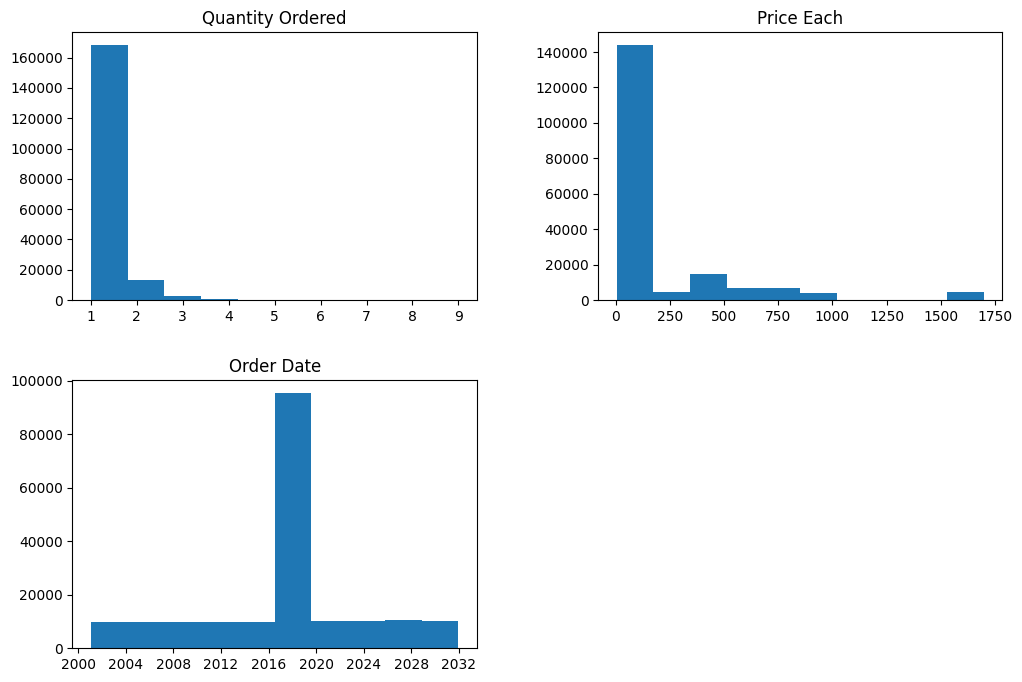

In [172]:
# Visualizing the distribution of Numerical Variables
sales_data.hist(figsize=(12,8), grid= False)
plt.show()

1. The most frequent quantity ordered 1.
2. The most frequent price of each product is between 0-200

In general, there seems to be no correlation between the quantity ordered and the price per order. There are expensive orders for small quantities and cheap orders for large quantities.



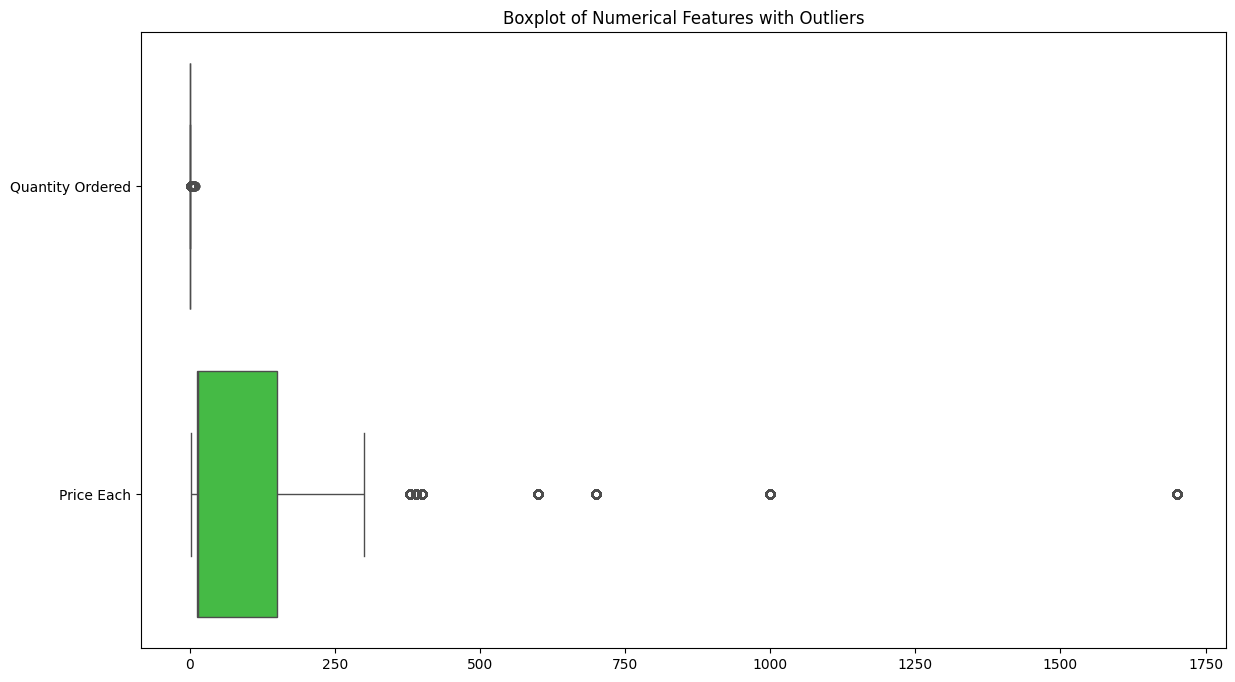

In [180]:
# Create a single boxplot to show outliers
cols = [ 'Quantity Ordered', 'Price Each']

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=sales_data[cols], whis=1.5, orient='h', palette=['skyblue', 'limegreen'])
plt.title("Boxplot of Numerical Features with Outliers")
plt.show()

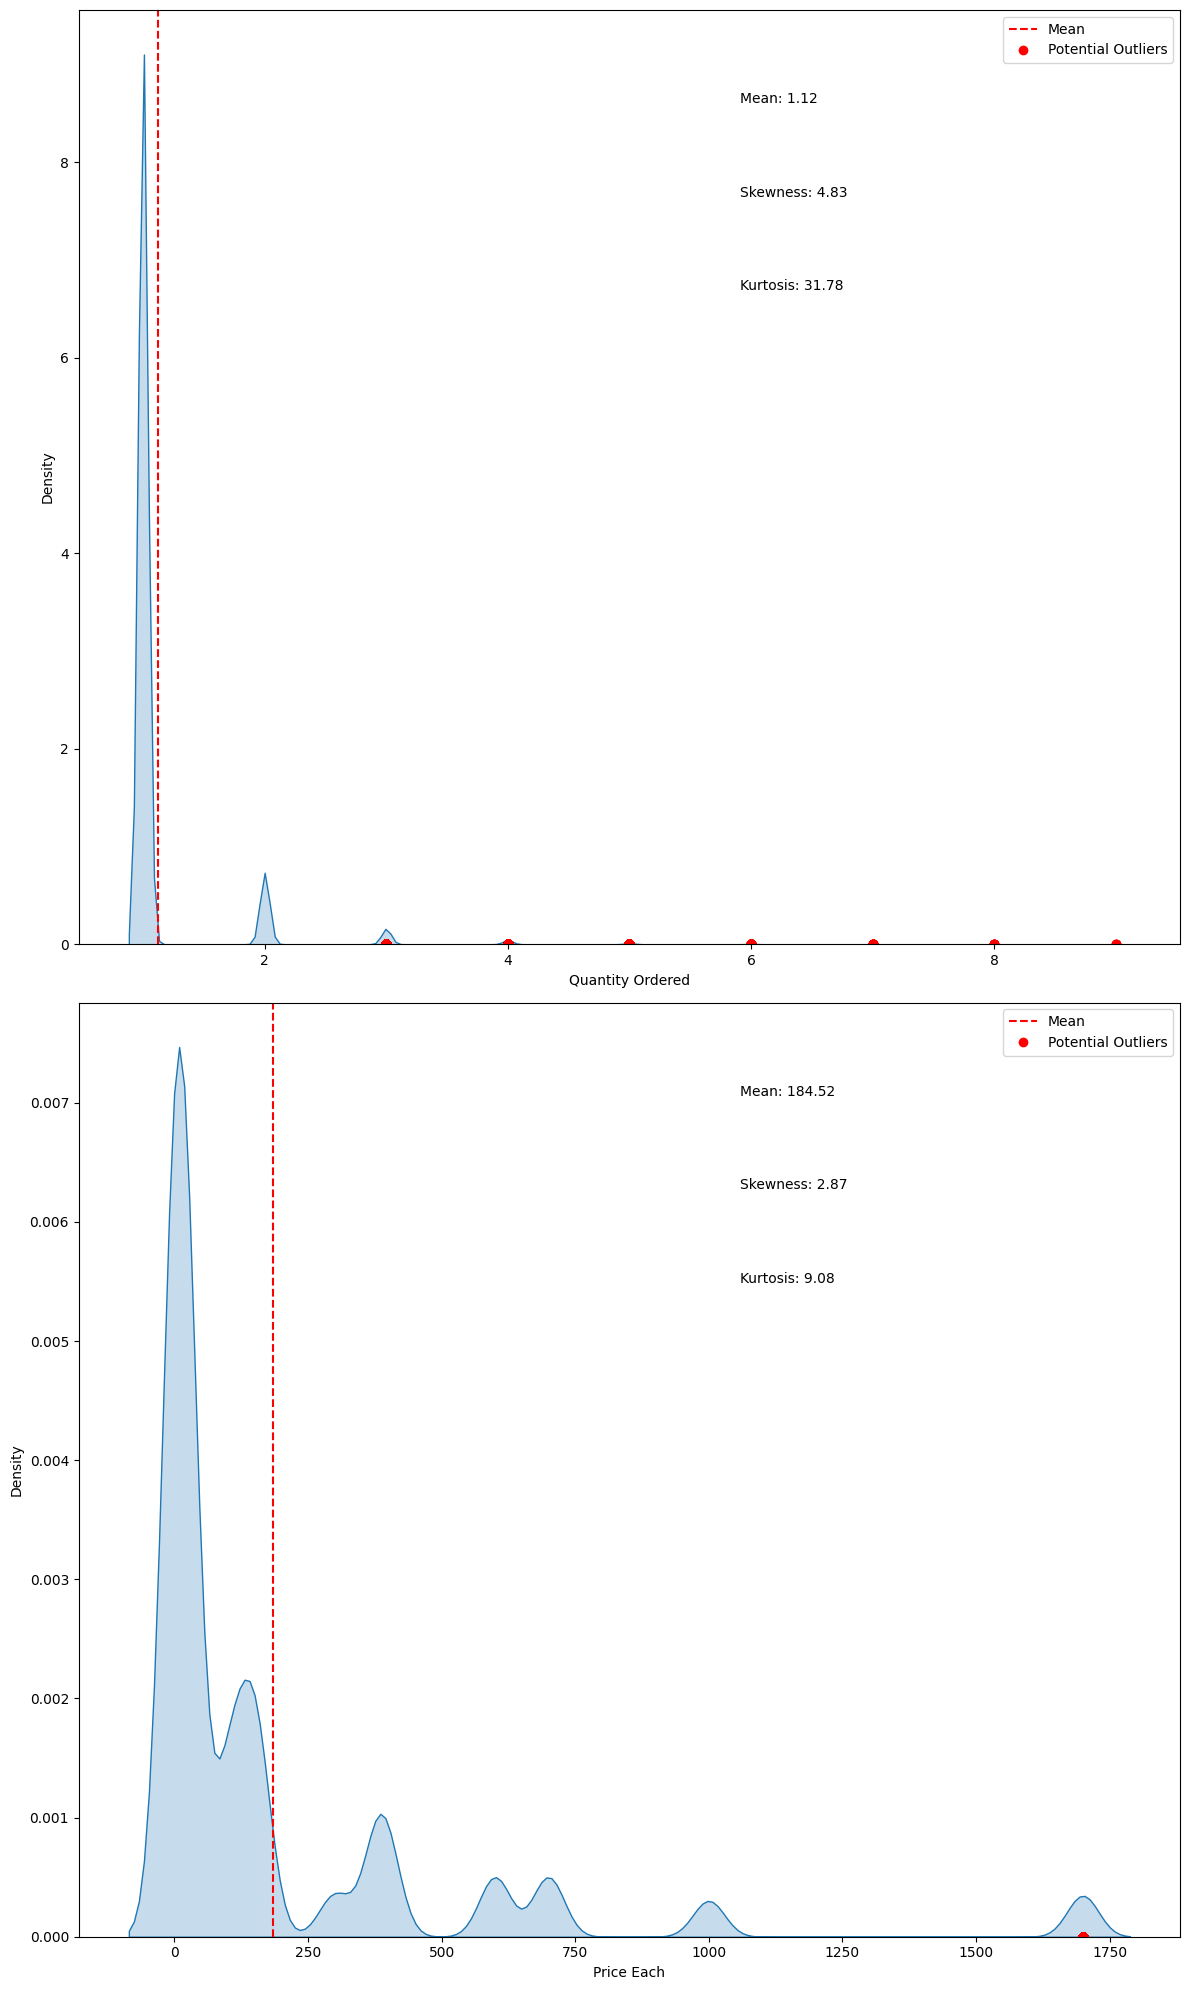

In [182]:
#Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols), figsize=(12, 20))
for i, col in enumerate(cols):
    sns.kdeplot(data=sales_data, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
   
    # Calculate mean, skewness, and kurtosis
    mean_val = sales_data[col].mean()
    skewness_val = sales_data[col].skew()
    kurtosis_val = sales_data[col].kurtosis()
   
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
   
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
   
    # Add red dots to indicate potential outliers
    outliers = sales_data[(sales_data[col] > mean_val + 3 * sales_data[col].std()) | (sales_data[col] < mean_val - 3 * sales_data[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
   
    # Add legend
    axes[i].legend()
   
plt.tight_layout()
plt.show()

observations:
1. the quantity ordered has a skweness of 4.83, so it suggests a positive skewness.The distribution  is heavily skewed towards higher values, with a long tail on the right side.
2. The price data exhibits significant positive skewness and high kurtosis, indicating a distribution that is highly right-skewed with heavy tails and a sharp peak around the mean price. This suggests that while most prices are clustered around the mean, there are notable outliers or extreme values at both ends of the price spectrum

### 2. <b> Bivariate Data analysis

Trend of monthly sales